<h1>Image Processing </h1>

In [9]:
import matplotlib.pyplot as plt 
import numpy as np
from skimage import io, filters
from math import floor

# The Original Image

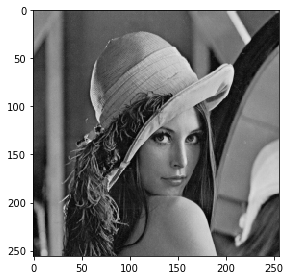

In [15]:
img = io.imread('../images/lena256.jpg')
io.imshow(img)

# Image Sharpening 
<code>kernel = np.array([[  0  , -.5 ,    0],
                  [-.5 ,   3  , -.5 ],
                   [0  , -.5 ,    0 ]]) </code>


/usr/local/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


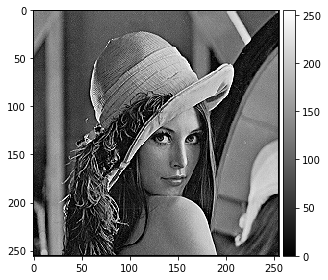

In [44]:
img = io.imread('../images/lena256.jpg')

kernel = np.array([[  0  , -.5 ,    0],
                  [-.5 ,   3  , -.5 ],
                   [0  , -.5 ,    0 ]])

# Middle of the kernel
offset = len(kernel) // 2
number = 0
output_img  = np.zeros((img.shape[0],img.shape[1]))

for i in range(offset,output_img.shape[0]-offset):
    for j in range(offset,output_img.shape[1]-offset):
        for x in range(len(kernel)):
            for y in range(len(kernel)):
                number += floor(kernel[x][y] * img[i+x-offset][j+y-offset])

        if number > 255:
            number = 255
        if number < 0:
            number = 0

        output_img[i][j] = number
        number = 0

io.imshow(output_img,cmap='gray',vmin=0, vmax=255)

io.imsave('sharpening.png',output_img)

# Blur an Image
<code>kernel = np.array([[1,1,1],
                   [1,1,1],
                   [1,1,1]]) </code>

Lossy conversion from float64 to uint8. Range [0.0, 220.0]. Convert image to uint8 prior to saving to suppress this warning.


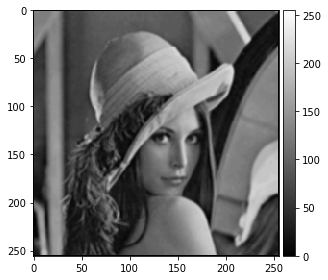

In [45]:
kernel = np.array([[1,1,1],
                   [1,1,1],
                   [1,1,1]])

kernel = kernel * 1/9


offset = len(kernel) // 2 

output_img  = np.zeros((img.shape[0],img.shape[1]))
nombre = 0 
for i in range(offset,output_img.shape[0]-offset):
    for j in range(offset,output_img.shape[1]-offset):
        for x in range(3):
            for y in range(3):
                nombre += floor(kernel[x][y] * img[i+x-offset][j+y-offset])

        output_img[i][j] = nombre
        nombre = 0

io.imshow(output_img,cmap='gray',vmin=0, vmax=255)

io.imsave('blurImage.png',output_img)

# Image Scaling 

Scaling is used to change the size of the image. It can be a scale down or up. There are several methods available to interpolate the pixels. We will use the simplest possible algorithm: Nearest Neighbor. Feel free to implement other algorithms such as the Bilinear algorithm, Box sampling, Fourier transform...

To compute the rescaled image, we need the ratio for both horizontal and vertical axes: x_ratio = old_img.x / new_img.x and y_ratio = old_img.y / new_img.y. The pixel at coordinate (x, y) in the new image is equal to the pixel that is located at coordinate (floor(x * x_ratio), floor(y * y_ratio))

Lossy conversion from float64 to uint8. Range [5.0, 238.0]. Convert image to uint8 prior to saving to suppress this warning.


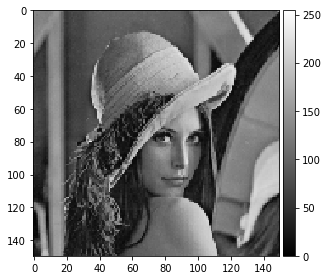

In [46]:
img = io.imread('../images/lena256.jpg')

output_img = np.zeros((150,150)) # new size

# get the difference
x_scale = img.shape[0] / output_img.shape[0] 
y_scale = img.shape[1] / output_img.shape[1]

# Copy pixels
for x in range(output_img.shape[0]):
    for y in range(output_img.shape[1]):
        xp, yp = floor(x * x_scale), floor(y * y_scale)
        output_img[x][y] =  img[xp, yp]


io.imshow(output_img,cmap='gray',vmin=0, vmax=255)

io.imsave('imageScaling.png',output_img)

# Image Resizing 

Lossy conversion from float64 to uint8. Range [5.0, 238.0]. Convert image to uint8 prior to saving to suppress this warning.


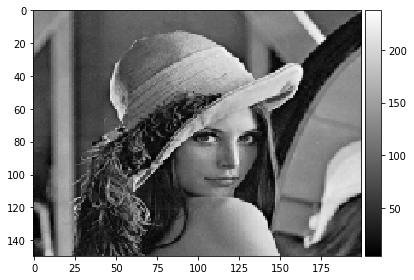

In [47]:
img = io.imread('../images/lena256.jpg')

output_img = np.zeros((150,200)) 

x_scale = img.shape[0] / output_img.shape[0]
y_scale = img.shape[1] / output_img.shape[1]
    # Copy pixels
for x in range(output_img.shape[0]):
    for y in range(output_img.shape[1]):
        xp, yp = floor(x * x_scale), floor(y * y_scale)
        output_img[x][y] =  img[xp, yp]


io.imshow(output_img,cmap='gray')

io.imsave('imageResizing.png',output_img)

# Image Cropping 
In order to crop an image, we need to copy in a new image the pixels we want to keep. Let origin be the coordinate of upper-left corner and end the coordinate of the bottom-right corner. The pixel at coordinate (x, y) in the new image is equal to the pixel located at coordinate (x + origin.x, y + origin.y) in the old image.

Lossy conversion from float64 to uint8. Range [4.0, 204.0]. Convert image to uint8 prior to saving to suppress this warning.


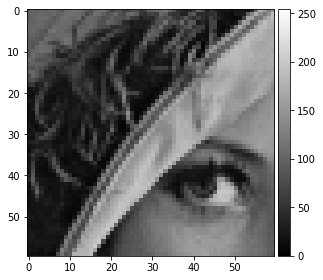

In [48]:
img = io.imread('../images/lena256.jpg')

origin = (90, 90)
end = (150, 150)

output_img = np.zeros( (end[0] - origin[0] , end[1] - origin[1]) )

for i in range(output_img.shape[0]):
    for j in range(output_img.shape[1]):
        output_img[i][j] = img[i+origin[0]][j+origin[1]]

io.imshow(output_img,cmap='gray',vmin=0, vmax=255)
io.imsave('imageCropping.png',output_img)

# Edge Detection 

<code>kernel = np.array([[-1,-1,-1],
                           [-1,8,-1],
                           [-1,-1,-1]  ] ) </code>

/usr/local/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


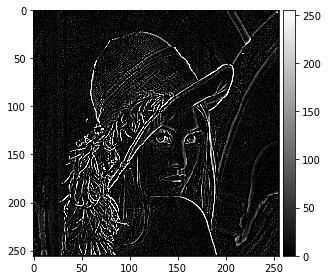

In [49]:
kernel = np.array([[-1,-1,-1],
                           [-1,8,-1],
                           [-1,-1,-1]])

img = io.imread('../images/lena256.jpg')

output = np.zeros(img.shape)
offset = len(kernel) // 2 
nombre = 0 
for i in range(offset,img.shape[0]-offset):
    for j in range(offset,img.shape[1]-offset):
        for x in range(3):
            for y in range(3):
                nombre += floor(kernel[x][y] * img[i+x-offset][j+y-offset])

        if nombre > 255:
            nombre = 255
        if nombre < 0:
            nombre = 0

        output[i][j] = nombre
        nombre = 0

io.imshow(output,cmap='gray',vmin=0, vmax=255)

io.imsave('edgeDetection.png',output)


# Thresholding 

/usr/local/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


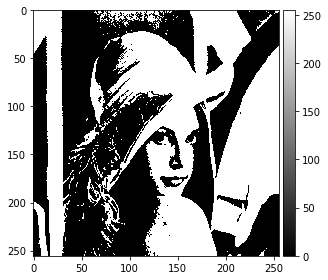

In [50]:

img = io.imread('../images/lena256.jpg')
A = np.average(img)

output = np.zeros(img.shape)
for i in range(img.shape[0]):
    for j in range(img.shape[0]):
        if img[i][j] > A:
            output[i][j] = 255
        else:
            output[i][j] = 0

io.imshow(output,cmap='gray',vmin=0, vmax=255)
io.imsave('thresholding.png',output)